Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
df = pd.read_csv("ApplicationData.csv")

In [ ]:
pd.set_option("display.max_columns", None)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
print(df.shape)

In [ ]:
missing = df.isnull().sum() / len(df) * 100
missing.sort_values(ascending=False)


,0
COMMONAREA_AVG,69.921398
COMMONAREA_MODE,69.921398
COMMONAREA_MEDI,69.921398
NONLIVINGAPARTMENTS_MEDI,69.429389
NONLIVINGAPARTMENTS_MODE,69.429389
...,...
FLAG_DOCUMENT_16,0.000000
FLAG_DOCUMENT_15,0.000000
FLAG_DOCUMENT_14,0.000000
FLAG_DOCUMENT_20,0.000000


In [ ]:
cols_to_drop = missing[missing > 40 ].sort_values(ascending=False).index
cols_to_drop

Index(['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MODE',
       'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'EXT_SOURCE_1',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG',
       'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG'

In [ ]:
# Dropped columns with 40% missing values
clean_df = df.drop(columns=cols_to_drop)

In [ ]:
clean_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
useless_cols = ['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','FLAG_OWN_REALTY','REGION_POPULATION_RELATIVE']

In [ ]:
# dropped usless columns for analysis
clean_df = df.drop(columns=useless_cols)
clean_df.shape

(49999, 24)

In [ ]:
missvalues = clean_df.isnull().sum()
missvalues.sort_values(ascending=False)

,0
OWN_CAR_AGE,32950
OCCUPATION_TYPE,15654
NAME_TYPE_SUITE,192
AMT_GOODS_PRICE,38
CNT_FAM_MEMBERS,1
AMT_ANNUITY,1
DAYS_LAST_PHONE_CHANGE,1
SK_ID_CURR,0
AMT_CREDIT,0
AMT_INCOME_TOTAL,0


In [ ]:
# filling missing categorical values with mode
clean_df['OCCUPATION_TYPE'].fillna(clean_df['OCCUPATION_TYPE'].mode()[0], inplace = True)
clean_df['NAME_TYPE_SUITE'].fillna(clean_df['NAME_TYPE_SUITE'].mode()[0], inplace = True)



/tmp/ipython-input-46-2937389136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['OCCUPATION_TYPE'].fillna(clean_df['OCCUPATION_TYPE'].mode()[0],inplace = True)
/tmp/ipython-input-46-2937389136.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [ ]:
# filling numerical missing values using median
clean_df['AMT_GOODS_PRICE'].fillna(clean_df['AMT_GOODS_PRICE'].median(), inplace = True)
clean_df['AMT_ANNUITY'].fillna(clean_df['AMT_ANNUITY'].median(), inplace = True)
clean_df['CNT_FAM_MEMBERS'].fillna(clean_df['CNT_FAM_MEMBERS'].median(), inplace = True)
clean_df['DAYS_LAST_PHONE_CHANGE'].fillna(clean_df['DAYS_LAST_PHONE_CHANGE'].median(), inplace = True)

# filling own_car_age with only people owning car
car_owner_median = clean_df[clean_df['FLAG_OWN_CAR'] == 'Y']['OWN_CAR_AGE'].median()
clean_df['OWN_CAR_AGE'].fillna(car_owner_median, inplace=True)


/tmp/ipython-input-47-2674223306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['AMT_GOODS_PRICE'].fillna(clean_df['AMT_GOODS_PRICE'].median(),inplace = True)
/tmp/ipython-input-47-2674223306.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [ ]:
missvalues = clean_df.isnull().sum()
missvalues.sort_values(ascending=False)

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0


In [ ]:
def cap_outliers_iqr_new_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    capped_col = df[column].clip(lower=lower_cap, upper=upper_cap)
    capped_col_name = column + '_CAPPED'

    df[capped_col_name] = capped_col

    outliers = ((df[column] < lower_cap) | (df[column] > upper_cap)).sum()
    print(f"{column}: {outliers} outliers capped → New column: '{capped_col_name}'")

# Apply to selected columns
columns_to_cap = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for col in columns_to_cap:
    cap_outliers_iqr_new_column(clean_df, col)


AMT_INCOME_TOTAL: 2295 outliers capped → New column: 'AMT_INCOME_TOTAL_CAPPED'
AMT_CREDIT: 1063 outliers capped → New column: 'AMT_CREDIT_CAPPED'
AMT_ANNUITY: 1188 outliers capped → New column: 'AMT_ANNUITY_CAPPED'


In [ ]:
clean_df.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_CAPPED,AMT_CREDIT_CAPPED,AMT_ANNUITY_CAPPED
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.333987,5.389923e+05,-16022.042081,63219.424488,-4977.282666,-2996.797176,10.031741,2.158943,-964.291986,162740.457631,5.930670e+05,26790.416768
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.802028,3.697208e+05,4361.400270,140794.605668,3525.548305,1509.235410,7.088116,0.911324,829.477807,73621.099877,3.805366e+05,13284.089989
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,-25184.000000,-17531.000000,-22392.000000,-6232.000000,0.000000,1.000000,-4002.000000,25650.000000,4.500000e+04,2052.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,-19644.000000,-2786.000000,-7463.500000,-4297.000000,9.000000,2.000000,-1573.000000,112500.000000,2.700000e+05,16456.500000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,-15731.000000,-1221.000000,-4490.000000,-3261.000000,9.000000,2.000000,-755.000000,145800.000000,5.147775e+05,24939.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12378.500000,-292.000000,-1998.000000,-1722.000000,9.000000,3.000000,-270.000000,202500.000000,8.086500e+05,34596.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7680.000000,365243.000000,0.000000,0.000000,65.000000,13.000000,0.000000,337500.000000,1.616625e+06,61805.250000


In [ ]:
cols_to_drop = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
clean_df.drop(columns=cols_to_drop, inplace = True)


In [ ]:
clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_CAPPED,AMT_CREDIT_CAPPED,AMT_ANNUITY_CAPPED
0,100002,1,Cash loans,M,N,0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,-2120,9.0,Laborers,1.0,Business Entity Type 3,-1134.0,202500.0,406597.5,24700.5
1,100003,0,Cash loans,F,N,0,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,-291,9.0,Core staff,2.0,School,-828.0,270000.0,1293502.5,35698.5
2,100004,0,Revolving loans,M,Y,0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,-2531,26.0,Laborers,1.0,Government,-815.0,67500.0,135000.0,6750.0
3,100006,0,Cash loans,F,N,0,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,-2437,9.0,Laborers,2.0,Business Entity Type 3,-617.0,135000.0,312682.5,29686.5
4,100007,0,Cash loans,M,N,0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,-3458,9.0,Core staff,1.0,Religion,-1106.0,121500.0,513000.0,21865.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,0,1206000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,-10667,-285,-2521,-3333,9.0,Waiters/barmen staff,1.0,Restaurant,-14.0,180000.0,1206000.0,45936.0
49995,157872,0,Cash loans,M,N,0,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-20211,-4651,-11281,-3722,9.0,Laborers,2.0,Construction,-1930.0,126000.0,1125000.0,47794.5
49996,157873,0,Cash loans,M,N,1,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,-10280,-1158,-8620,-2604,9.0,Laborers,3.0,Business Entity Type 1,-712.0,112500.0,900000.0,26316.0
49997,157874,0,Cash loans,F,N,0,733500.0,Family,Working,Secondary / secondary special,Married,House / apartment,-23485,-2181,-2662,-4200,9.0,Cleaning staff,2.0,Other,-1989.0,270000.0,820638.0,34897.5


In [ ]:
targets_count = clean_df['TARGET'].value_counts()
target_ratio = targets_count[0] / targets_count[1]

print("Target Value Counts: ", targets_count)
print(f"Imbalance Ratio (Non-Default : Default) = {target_ratio:.2f} : 1")

Target Value Counts:
 TARGET
0    45973
1     4026
Name: count, dtype: int64
Imbalance Ratio (Non-Default : Default) = 11.42 : 1


In [ ]:
clean_df = clean_df[clean_df['CODE_GENDER'] != 'XNA']

In [ ]:
code_gender_count = clean_df['CODE_GENDER'].value_counts()
gender_ratio = code_gender_count['F'] / code_gender_count['M']

print("Code Gender Value Counts: ",code_gender_count )
print(f"Imbalance Ratio (Female : Male) = {gender_ratio:.2f} : 1")

Code Gender Value Counts:
 CODE_GENDER
F    32823
M    17174
Name: count, dtype: int64
Imbalance Ratio (Female : Male) = 1.91 : 1


In [ ]:
NAME_CONTRACT_TYPE_count = clean_df['NAME_CONTRACT_TYPE'].value_counts()
NAME_CONTRACT_TYPE_count
contract_ratio = NAME_CONTRACT_TYPE_count['Cash loans'] / NAME_CONTRACT_TYPE_count['Revolving loans']

print("contract_type_value Counts: ", NAME_CONTRACT_TYPE_count)
print(f"Imbalance Ratio (Cash loans : Revolving loans) = {contract_ratio:.2f} : 1")

contract_type_value Counts:
 NAME_CONTRACT_TYPE
Cash loans         45276
Revolving loans     4721
Name: count, dtype: int64
Imbalance Ratio (Cash loans : Revolving loans) = 9.59 : 1


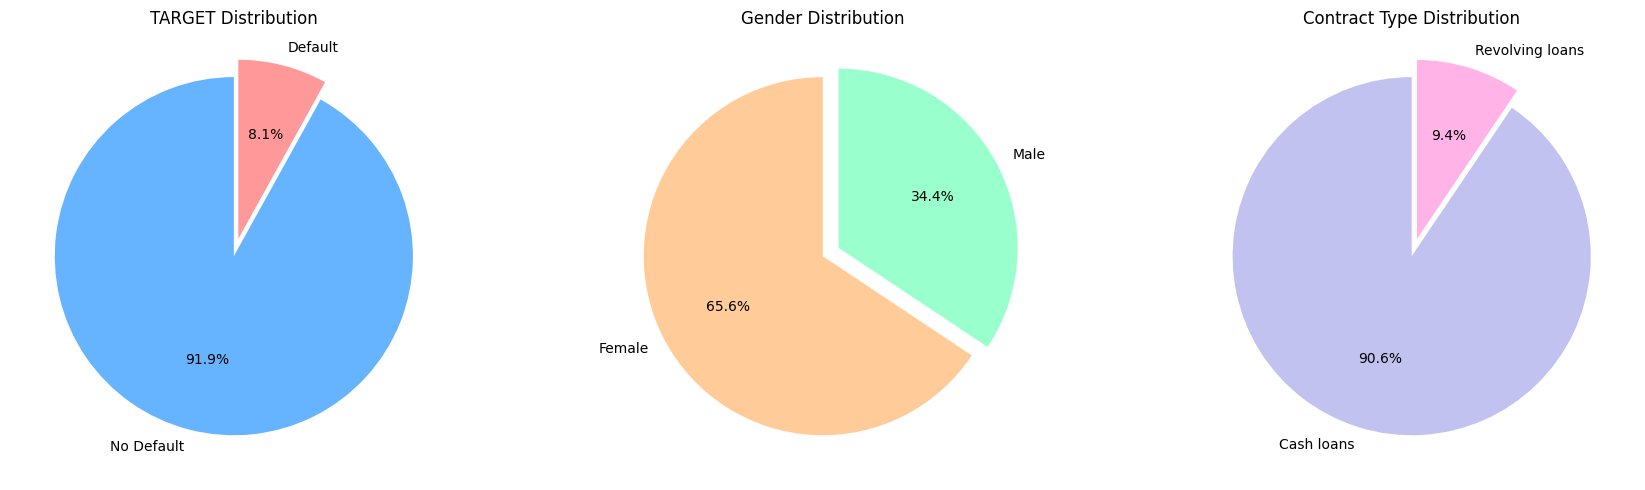

In [ ]:
# Create the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart 1: TARGET
axes[0].pie(targets_count,
            labels=['No Default', 'Default'],
            autopct='%1.1f%%',
            startangle=90,
            explode=(0, 0.1),
            colors=['#66b3ff', '#ff9999'])
axes[0].set_title('TARGET Distribution')

# Pie chart 2: Gender
axes[1].pie(code_gender_count,
            labels=['Female', 'Male'],
            autopct='%1.1f%%',
            startangle=90,
            explode=(0, 0.1),
            colors=['#ffcc99', '#99ffcc'])
axes[1].set_title('Gender Distribution')

# Pie chart 3: Contract Type
axes[2].pie(NAME_CONTRACT_TYPE_count,
            labels=['Cash loans', 'Revolving loans'],
            autopct='%1.1f%%',
            startangle=90,
            explode=(0, 0.1),
            colors=['#c2c2f0', '#ffb3e6'])
axes[2].set_title('Contract Type Distribution')

plt.tight_layout()
plt.show()

In [ ]:
clean_df['AMT_INCOME_TOTAL_CAPPED'].describe()


,AMT_INCOME_TOTAL_CAPPED
count,49997.000000
mean,162739.677203
std,73622.302572
min,25650.000000
25%,112500.000000
50%,145800.000000
75%,202500.000000
max,337500.000000


In [ ]:
clean_df['AMT_CREDIT_CAPPED'].describe()


,AMT_CREDIT_CAPPED
count,4.999700e+04
mean,5.930776e+05
std,3.805403e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.147775e+05
75%,8.086500e+05
max,1.616625e+06


In [ ]:
clean_df['AMT_ANNUITY_CAPPED'].describe()


,AMT_ANNUITY_CAPPED
count,49997.000000
mean,26790.835910
std,13284.178471
min,2052.000000
25%,16456.500000
50%,24939.000000
75%,34596.000000
max,61805.250000


In [ ]:
clean_df['AGE_YEARS'] = (-clean_df['DAYS_BIRTH'] / 365).astype(int)
clean_df['AGE_YEARS'].describe()


/tmp/ipython-input-60-2649240714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['AGE_YEARS'] = (-clean_df['DAYS_BIRTH'] / 365).astype(int)


,AGE_YEARS
count,49997.000000
mean,43.394644
std,11.947727
min,21.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,68.000000


In [ ]:
clean_df['DAYS_EMPLOYED'].describe()


,DAYS_EMPLOYED
count,49997.000000
mean,63222.210253
std,140796.730914
min,-17531.000000
25%,-2786.000000
50%,-1221.000000
75%,-292.000000
max,365243.000000


In [ ]:
def calculate_default_rate(df, col):
    count_table = pd.crosstab(df[col], df['TARGET'])
    default_rate = df.groupby(col)['TARGET'].mean() * 100
    print(f"\n📊 Default rate for: {col}")
    print(count_table)
    print("\nDefault Rate (%):")
    print(default_rate.round(2))


In [ ]:
# 1. Gender
calculate_default_rate(clean_df, 'CODE_GENDER')

# 2. Contract Type
calculate_default_rate(clean_df, 'NAME_CONTRACT_TYPE')

# 3. Education Level
calculate_default_rate(clean_df, 'NAME_EDUCATION_TYPE')

# 4. Occupation Type
calculate_default_rate(clean_df, 'OCCUPATION_TYPE')

# 5. Income Type
calculate_default_rate(clean_df, 'NAME_INCOME_TYPE')

# 6. Family Status
calculate_default_rate(clean_df, 'NAME_FAMILY_STATUS')

# 7. Housing Type
calculate_default_rate(clean_df, 'NAME_HOUSING_TYPE')



📊 Default rate for: CODE_GENDER
TARGET           0     1
CODE_GENDER             
F            30559  2264
M            15412  1762

Default Rate (%):
CODE_GENDER
F     6.90
M    10.26
Name: TARGET, dtype: float64

📊 Default rate for: NAME_CONTRACT_TYPE
TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans          41484  3792
Revolving loans      4487   234

Default Rate (%):
NAME_CONTRACT_TYPE
Cash loans         8.38
Revolving loans    4.96
Name: TARGET, dtype: float64

📊 Default rate for: NAME_EDUCATION_TYPE
TARGET                             0     1
NAME_EDUCATION_TYPE                       
Academic degree                   20     0
Higher education               11561   606
Incomplete higher               1482   138
Lower secondary                  547    73
Secondary / secondary special  32361  3209

Default Rate (%):
NAME_EDUCATION_TYPE
Academic degree                   0.00
Higher education                  4.98
Incomplete higher                 8.52
Lowe

/tmp/ipython-input-76-848623223.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rates_df, x='Default Rate (%)', y=col, palette='coolwarm')
/tmp/ipython-input-76-848623223.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rates_df, x='Default Rate (%)', y=col, palette='coolwarm')
/tmp/ipython-input-76-848623223.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rates_df, x='Default Rate (%)', y=col, palette='coolwarm')
/tmp/ipython-input-76-848623223.py:27: FutureWarning: 

Passing `palette` without ass

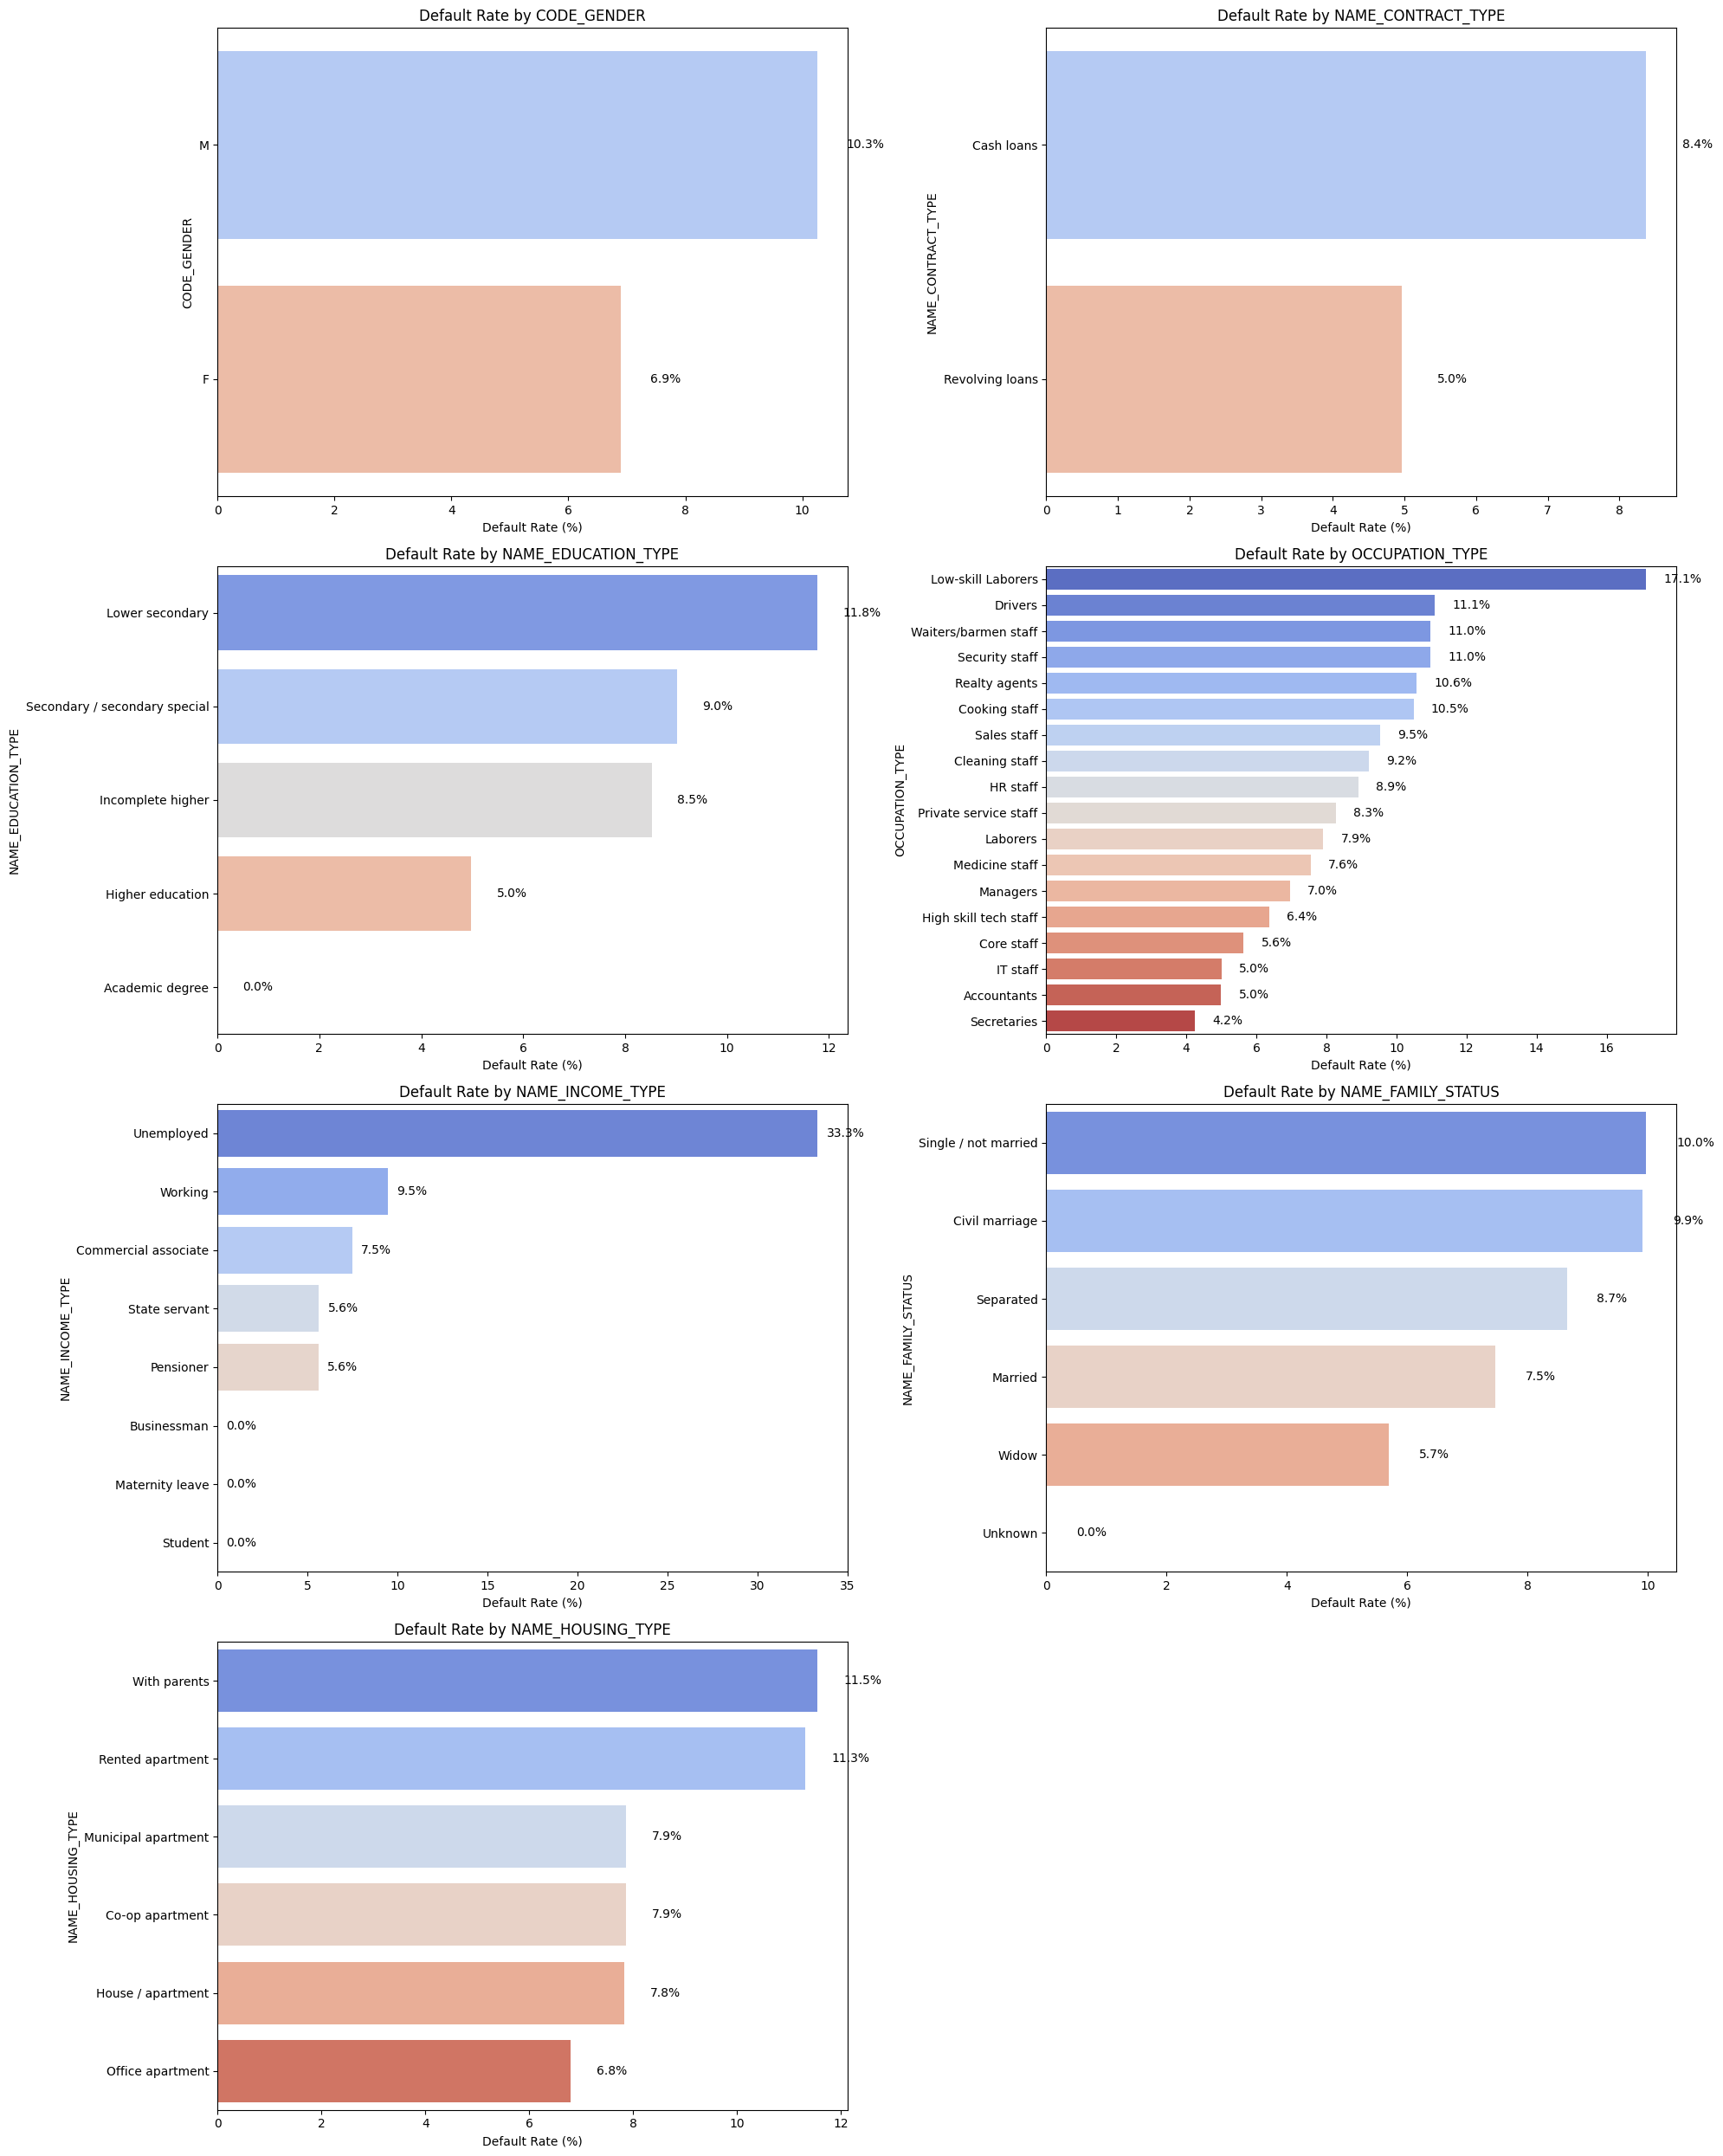

In [ ]:
# Step 1: Function to calculate default rate (%) by a categorical column
def default_rate_df(df, column):
    rates = df.groupby(column)['TARGET'].mean().sort_values(ascending=False) * 100
    return rates.reset_index(name='Default Rate (%)')

# Step 2: List of columns to analyze
categorical_cols = [
    'CODE_GENDER',
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE',
    'OCCUPATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE'
]

# Step 3: Plot with data labels
plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)

    # Get default rates for the column
    rates_df = default_rate_df(clean_df, col)

    # Create barplot
    ax = sns.barplot(data=rates_df, x='Default Rate (%)', y=col, palette='coolwarm')
    plt.title(f'Default Rate by {col}')
    plt.xlabel('Default Rate (%)')
    plt.ylabel(col)

    # Add data labels on each bar
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,                 # X position (slightly outside bar)
                p.get_y() + p.get_height()/2, # Y position (centered)
                f'{width:.1f}%',              # Text label
                va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Define custom income bins
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
labels = ['<50k', '50k–100k', '100k–150k', '150k–200k', '200k–300k', '300k–500k', '>500k']

# Create a new column for income groups
clean_df['INCOME_GROUP'] = pd.cut(clean_df['AMT_INCOME_TOTAL_CAPPED'], bins=income_bins, labels=labels)

# Compare average loan credit for each income bracket
income_credit_comparison = clean_df.groupby('INCOME_GROUP')['AMT_CREDIT_CAPPED'].agg(['count', 'mean', 'median', 'max', 'min']).round(0)

print(income_credit_comparison)


              count      mean    median        max      min
INCOME_GROUP                                               
<50k            804  296315.0  225000.0  1616625.0  45000.0
50k–100k       9588  392949.0  288873.0  1616625.0  45000.0
100k–150k     14852  519207.0  450000.0  1616625.0  45000.0
150k–200k     10407  628540.0  545040.0  1616625.0  45000.0
200k–300k     10605  752167.0  679500.0  1616625.0  45000.0
300k–500k      3741  913409.0  900000.0  1616625.0  90000.0
>500k             0       NaN       NaN        NaN      NaN


/tmp/ipython-input-64-2841276340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['INCOME_GROUP'] = pd.cut(clean_df['AMT_INCOME_TOTAL_CAPPED'], bins=income_bins, labels=labels)
/tmp/ipython-input-64-2841276340.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_credit_comparison = clean_df.groupby('INCOME_GROUP')['AMT_CREDIT_CAPPED'].agg(['count', 'mean', 'median', 'max', 'min']).round(0)


/tmp/ipython-input-79-3952413144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df,


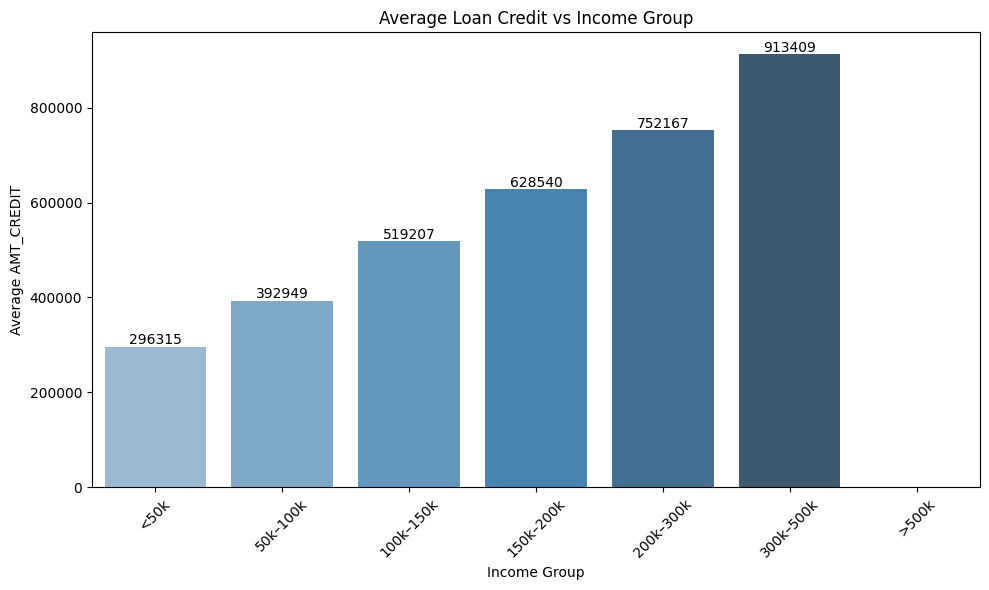

In [ ]:
# Remove rows where income group is NaN
plot_df = income_credit_comparison.dropna().reset_index()

# Plot average credit by income group
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df,
            x='INCOME_GROUP',
            y='mean',
            palette='Blues_d')

plt.title('Average Loan Credit vs Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average AMT_CREDIT')
plt.xticks(rotation=45)

# Add data labels on top of bars
for i, row in plot_df.iterrows():
    plt.text(i, row['mean'] + 5000, f"{int(row['mean'])}", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
non_defaulters = clean_df[clean_df['TARGET'] == 0]
cols = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL_CAPPED',
    'AMT_CREDIT_CAPPED',
    'AMT_ANNUITY_CAPPED',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
]

correlation_nondefaulters = non_defaulters[cols].corr()
correlation_nondefaulters.round(3)



,CNT_CHILDREN,AMT_INCOME_TOTAL_CAPPED,AMT_CREDIT_CAPPED,AMT_ANNUITY_CAPPED,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000,0.038,0.006,0.030,0.002,0.336,-0.244
AMT_INCOME_TOTAL_CAPPED,0.038,1.000,0.419,0.494,0.424,0.090,-0.193
AMT_CREDIT_CAPPED,0.006,0.419,1.000,0.795,0.975,-0.053,-0.079
AMT_ANNUITY_CAPPED,0.030,0.494,0.795,1.000,0.791,0.013,-0.120
AMT_GOODS_PRICE,0.002,0.424,0.975,0.791,1.000,-0.049,-0.075
DAYS_BIRTH,0.336,0.090,-0.053,0.013,-0.049,1.000,-0.615
DAYS_EMPLOYED,-0.244,-0.193,-0.079,-0.120,-0.075,-0.615,1.000


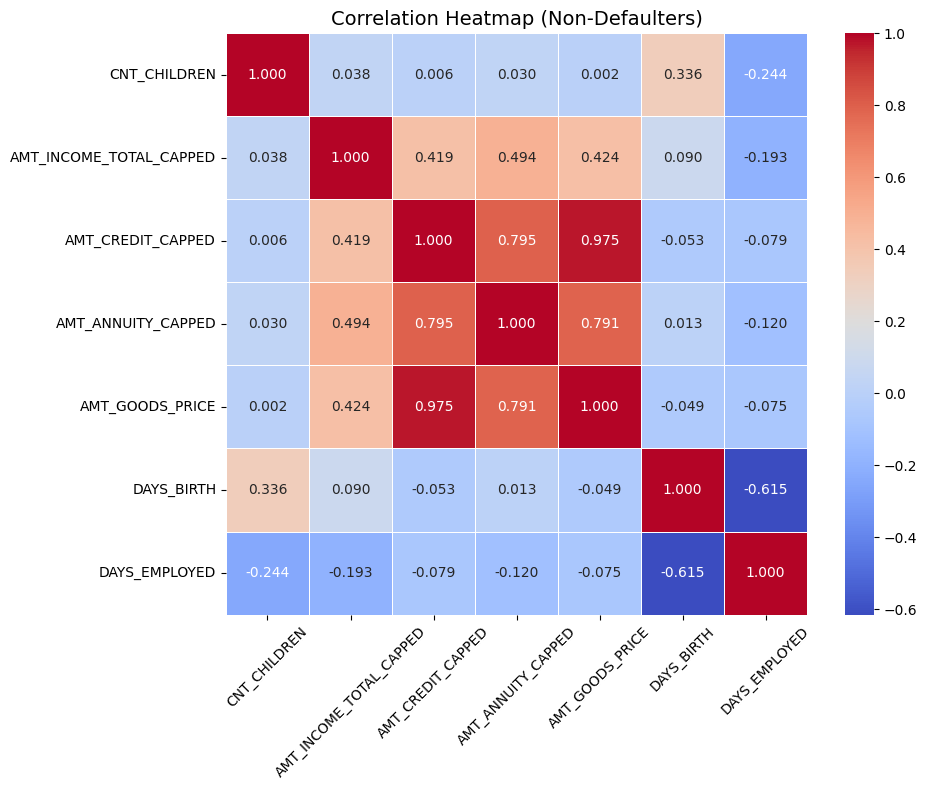

In [ ]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_nondefaulters,
            annot=True,          # show values in each cell
            fmt=".3f",           # 3 decimal places
            cmap='coolwarm',     # color palette
            linewidths=0.5,      # line between boxes
            square=True)

# Title and layout
plt.title('Correlation Heatmap (Non-Defaulters)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
defaulters = clean_df[clean_df['TARGET'] == 1]
cols = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL_CAPPED',
    'AMT_CREDIT_CAPPED',
    'AMT_ANNUITY_CAPPED',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
]

correlation_defaulters = defaulters[cols].corr()
correlation_defaulters.round(3)

,CNT_CHILDREN,AMT_INCOME_TOTAL_CAPPED,AMT_CREDIT_CAPPED,AMT_ANNUITY_CAPPED,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000,-0.008,0.010,0.030,-0.001,0.250,-0.189
AMT_INCOME_TOTAL_CAPPED,-0.008,1.000,0.349,0.425,0.348,0.016,-0.141
AMT_CREDIT_CAPPED,0.010,0.349,1.000,0.755,0.974,-0.142,0.016
AMT_ANNUITY_CAPPED,0.030,0.425,0.755,1.000,0.750,-0.007,-0.080
AMT_GOODS_PRICE,-0.001,0.348,0.974,0.750,1.000,-0.141,0.020
DAYS_BIRTH,0.250,0.016,-0.142,-0.007,-0.141,1.000,-0.581
DAYS_EMPLOYED,-0.189,-0.141,0.016,-0.080,0.020,-0.581,1.000


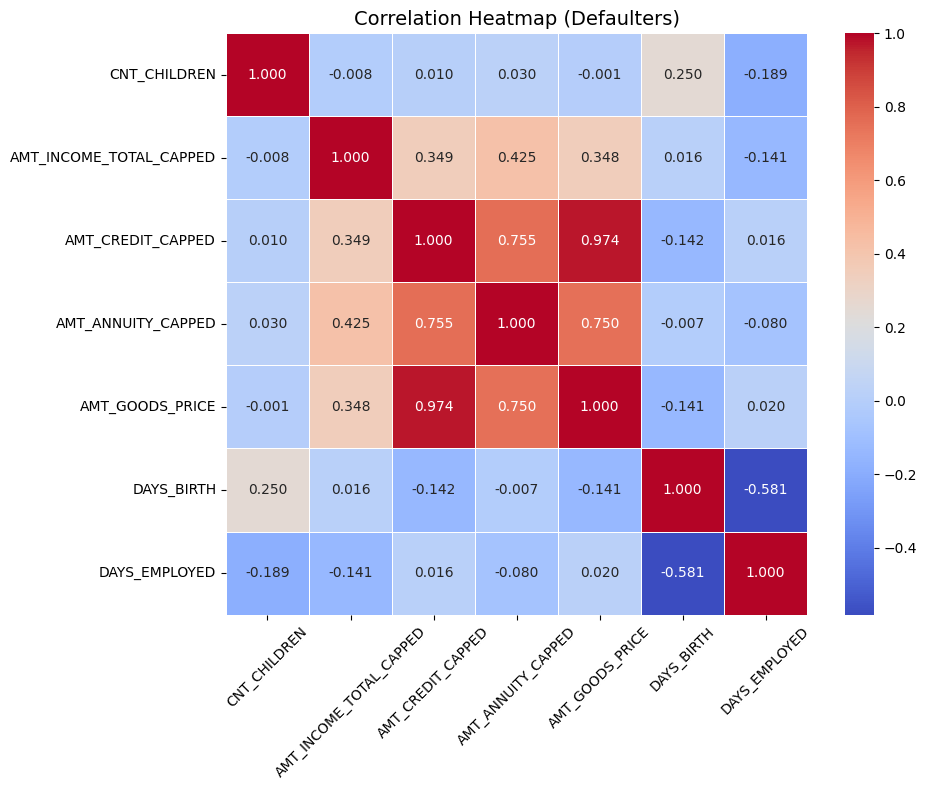

In [ ]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_defaulters,
            annot=True,          # show correlation values
            fmt=".3f",           # format values to 3 decimals
            cmap='coolwarm',     # red-blue palette
            linewidths=0.5,      # lines between cells
            square=True)

# Add title and layout tweaks
plt.title('Correlation Heatmap (Defaulters)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()